In [1]:
import sys, os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from subprocess import check_output
import os

os.getcwd()
sys.path.append('tools')

In [2]:

from configmanager import ConfigurationManager
configurationManager = ConfigurationManager()

In [3]:
ana_dataset = configurationManager.config_readable['ana_dataset']  
dnn_dataset = configurationManager.config_readable['dnn_dataset'] 
output_path_folder = configurationManager.config_readable['output_path_folder'] 
dnn_rnn_dataset = configurationManager.config_readable['dnn_rnn_dataset']  

# Ana Result

In [4]:
path_dnn_ana_result_dataframe = output_path_folder+'/dnn_ana_result_dataframe.csv'
dnn_ana_result_dataframe =pd.read_csv(path_dnn_ana_result_dataframe)

In [5]:
dnn_ana_result_dataframe.head()

,olusturulma_zamani,flight_id,toplam_frame,kac_karsilasma,ucus_var_tahmin_yok,ucus_yok_tahmin_var,max_range,fps,camera_size,model
0,2023-03-12 12:11:45.631916,0001ba865c8e410e88609541b8f55ffc,1199,102,18,5,692.553591,10,"('camera_type:', 'amazon_prime_air_half', ' wi...",best_300_1024.pt
1,2023-03-12 12:13:45.717170,0011f3f114a741b5b02326c9e96e597a,1199,82,18,0,680.240513,10,"('camera_type:', 'amazon_prime_air_half', ' wi...",best_300_1024.pt
2,2023-03-12 12:15:45.143928,0036dcc16c474b1abaf14d1735a7e1cf,1199,83,34,8,526.515128,10,"('camera_type:', 'amazon_prime_air_half', ' wi...",best_300_1024.pt
3,2023-03-12 12:17:45.200912,006345553ed64e77a52d94035e1e747a,1199,103,55,0,488.253885,10,"('camera_type:', 'amazon_prime_air_half', ' wi...",best_300_1024.pt
4,2023-03-12 12:19:44.816896,0071600242424070b5e0c8cb237192db,1197,95,16,37,696.219712,10,"('camera_type:', 'amazon_prime_air_half', ' wi...",best_300_1024.pt


In [6]:
dnn_ana_result_dataframe.tail()

,olusturulma_zamani,flight_id,toplam_frame,kac_karsilasma,ucus_var_tahmin_yok,ucus_yok_tahmin_var,max_range,fps,camera_size,model
142,2023-03-16 15:19:57.208721,02a8b666e30848c890d719c8c37ade9b,33,1179,1146,0,219.521259,9,"('camera_type:', 'amazon_prime_air_half', ' wi...",best_360_1024.pt
143,2023-03-16 15:33:00.868321,02a8b666e30848c890d719c8c37ade9b,27,1179,1152,0,219.521259,9,"('camera_type:', 'amazon_prime_air_half', ' wi...",best_360_1024.pt
144,2023-03-16 15:33:55.400196,02a8b666e30848c890d719c8c37ade9b,26,1179,1153,0,219.521259,9,"('camera_type:', 'amazon_prime_air_half', ' wi...",best_360_1024.pt
145,2023-03-16 15:56:21.670835,02a8b666e30848c890d719c8c37ade9b,36,1179,1143,0,219.521259,9,"('camera_type:', 'amazon_prime_air_half', ' wi...",best_360_1024.pt
146,2023-03-16 16:00:47.471272,02a8b666e30848c890d719c8c37ade9b,69,1179,1110,0,219.521259,7,"('camera_type:', 'amazon_prime_air_half', ' wi...",best_360_1024.pt


In [7]:
dnn_ana_result_dataframe['model'].value_counts(dropna =False)

dnn_ana_result_dataframe = dnn_ana_result_dataframe[dnn_ana_result_dataframe['model']=='best_350_1024.pt']

In [8]:
# FalseNegatif
max_value = dnn_ana_result_dataframe['ucus_var_tahmin_yok'].max()
max_index = dnn_ana_result_dataframe['ucus_var_tahmin_yok'].idxmax()
max_row = dnn_ana_result_dataframe.loc[max_index]
max_row

olusturulma_zamani                            2023-03-14 01:53:26.994248
flight_id                               036edfd6ece44c37b8ca9562fd701682
toplam_frame                                                          27
kac_karsilasma                                                      1199
ucus_var_tahmin_yok                                                 1185
ucus_yok_tahmin_var                                                    0
max_range                                                     403.328105
fps                                                                    9
camera_size            ('camera_type:', 'amazon_prime_air_half', ' wi...
model                                                   best_350_1024.pt
Name: 107, dtype: object

In [9]:
# FalsePozitif
max_value = dnn_ana_result_dataframe['ucus_yok_tahmin_var'].max()
max_index = dnn_ana_result_dataframe['ucus_yok_tahmin_var'].idxmax()
max_row = dnn_ana_result_dataframe.loc[max_index]
max_row

olusturulma_zamani                            2023-03-13 18:19:01.861426
flight_id                               014de7485c964f4990229c05e1ae5bee
toplam_frame                                                        1199
kac_karsilasma                                                       449
ucus_var_tahmin_yok                                                   43
ucus_yok_tahmin_var                                                  241
max_range                                                     536.439052
fps                                                                   10
camera_size            ('camera_type:', 'amazon_prime_air_half', ' wi...
model                                                   best_350_1024.pt
Name: 66, dtype: object

# Train - Test Back - Test Uçuş

In [10]:
ana_train_islemis_dataframe =pd.read_csv(ana_dataset+'/ana_train_islemis_dataframe.csv')
ana_test_background_islemis_dataframe =pd.read_csv(ana_dataset+'/ana_test_background_islemis_dataframe.csv')
ana_test_islemis_dataframe =pd.read_csv(ana_dataset+'/ana_test_islemis_dataframe.csv')

ana_train_islemis_dataframe.head()

,flight_id,toplam_frame,aldigimiz_background_sayisi,toplam_background_sayisi,all_objects
0,0001ba865c8e410e88609541b8f55ffc,1199,8,1102,{'Helicopter1'}
1,0011f3f114a741b5b02326c9e96e597a,1199,8,1117,{'Airplane1'}
2,0036dcc16c474b1abaf14d1735a7e1cf,1199,6,1124,{'Helicopter1'}
3,006345553ed64e77a52d94035e1e747a,1199,10,1096,{'Helicopter1'}
4,0071600242424070b5e0c8cb237192db,1197,4,1139,{'Airplane1'}


In [11]:

ana_test_background_islemis_dataframe.head()

,flight_id,toplam_frame
0,001578c6c6b340738c9277fcb1307e34,1199
1,0022217d1ed446e9a3a5fef13d33facf,1199
2,003e7a4bf58b4849a90556cb26de248c,1199
3,004474050bdc46c2805ae42048c24c2f,1199
4,004c26c2de5a4d2a85248be48844cb48,1199


In [12]:

ana_test_islemis_dataframe.head()

,flight_id,toplam_frame,aldigimiz_background_sayisi,toplam_background_sayisi,all_objects


# Flight ID

In [40]:
flight_id = "02a8b666e30848c890d719c8c37ade9b"

flight_id_var_mi=ana_train_islemis_dataframe[ana_train_islemis_dataframe["flight_id"]==flight_id].empty

if flight_id_var_mi ==False:
    temp = ana_train_islemis_dataframe[ana_train_islemis_dataframe["flight_id"]==flight_id]
    print("trainde")
    

flight_id_var_mi=ana_test_background_islemis_dataframe[ana_test_background_islemis_dataframe["flight_id"]==flight_id].empty
if flight_id_var_mi==False:
    temp = ana_test_background_islemis_dataframe[ana_test_background_islemis_dataframe["flight_id"]==flight_id]
    print("test_background_islemis_dataframe")

flight_id_var_mi=ana_test_islemis_dataframe[ana_test_islemis_dataframe["flight_id"]==flight_id].empty
if flight_id_var_mi==False:
    temp = ana_test_islemis_dataframe[ana_test_islemis_dataframe["flight_id"]==flight_id]
    print("test_islemis_dataframe")


temp

trainde


,flight_id,toplam_frame,aldigimiz_background_sayisi,toplam_background_sayisi,all_objects
30,02a8b666e30848c890d719c8c37ade9b,1199,116,20,{'Helicopter1'}


## Result flight

In [44]:
path_dnn_result_dataframe = os.path.join(output_path_folder+flight_id+"/")+'/dnn_result_dataframe.csv'

dnn_result_dataframe = pd.read_csv(path_dnn_result_dataframe)


dnn_result_dataframe['diff_width'] = dnn_result_dataframe['dnn_width'] - dnn_result_dataframe['pred_width']
dnn_result_dataframe['diff_height'] = dnn_result_dataframe['dnn_height'] - dnn_result_dataframe['pred_height']

dnn_result_dataframe['dnn_area'] = dnn_result_dataframe['dnn_width'] * dnn_result_dataframe['dnn_height']
dnn_result_dataframe['pred_area'] = dnn_result_dataframe['pred_width'] * dnn_result_dataframe['pred_height']
dnn_result_dataframe['diff_area'] = dnn_result_dataframe['dnn_area'] - dnn_result_dataframe['pred_area']


dnn_result_dataframe['diff_range'] = dnn_result_dataframe['dnn_range_distance'] - dnn_result_dataframe['pred_range_distance']


dnn_result_dataframe.head()

,frame_id,result_type,dnn_object_type,dnn_width,dnn_height,dnn_range_distance,pred_object_type,pred_width,pred_height,pred_range_distance,pred_confidence,diff_width,diff_height,dnn_area,pred_area,diff_area,diff_range
0,2,FalseNagative,Helicopter,30.481201,28.366797,219.716634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,864.654042,NaN,NaN,NaN
1,3,TruePositive,Helicopter,30.076123,28.334473,219.483164,Helicopter,28.0,28.0,555.3492,0.851845,2.076123,0.334473,852.191086,784.0,68.191086,-335.866036
2,4,TruePositive,Helicopter,30.232178,29.788159,219.438297,Helicopter,30.0,28.0,554.0318,0.845083,0.232178,1.788159,900.560923,840.0,60.560923,-334.593503
3,5,TruePositive,Helicopter,30.088867,30.257446,219.521259,Helicopter,28.0,30.0,550.1728,0.855579,2.088867,0.257446,910.412283,840.0,70.412283,-330.651541
4,6,TruePositive,Helicopter,29.885498,30.357178,219.330092,Helicopter,30.0,28.0,554.0318,0.860713,-0.114502,2.357178,907.239376,840.0,67.239376,-334.701708


In [45]:
dnn_result_dataframe.tail()

,frame_id,result_type,dnn_object_type,dnn_width,dnn_height,dnn_range_distance,pred_object_type,pred_width,pred_height,pred_range_distance,pred_confidence,diff_width,diff_height,dnn_area,pred_area,diff_area,diff_range
1174,1176,FalseNagative,Helicopter,44.079346,24.512329,263.195957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1080.487429,NaN,NaN,NaN
1175,1177,FalseNagative,Helicopter,43.000000,24.200000,263.798750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.600000,NaN,NaN,NaN
1176,1178,FalseNagative,Helicopter,44.610791,24.206421,264.244569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1079.867584,NaN,NaN,NaN
1177,1179,FalseNagative,Helicopter,44.498241,24.218926,264.663350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1077.699573,NaN,NaN,NaN
1178,1180,FalseNagative,Helicopter,21.609357,24.310459,265.160682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,525.333399,NaN,NaN,NaN


In [46]:
dnn_result_dataframe.describe()

,frame_id,dnn_width,dnn_height,dnn_range_distance,pred_width,pred_height,pred_range_distance,pred_confidence,diff_width,diff_height,dnn_area,pred_area,diff_area,diff_range
count,1179.000000,1179.000000,1179.000000,1179.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,1179.000000,370.000000,370.000000,370.000000
mean,591.000000,38.304030,34.423619,191.568485,27.481081,31.729730,486.104228,0.852006,0.939804,0.789124,1327.098173,880.194595,51.493319,-291.456643
std,340.492291,8.286896,5.511679,29.069944,3.333483,3.076695,76.900614,0.023381,1.693073,1.350330,380.729195,185.171377,67.489304,62.656537
min,2.000000,20.895630,21.840698,147.349541,20.000000,26.000000,343.791660,0.755129,-3.805298,-3.000000,525.333399,520.000000,-131.968117,-361.315675
25%,296.500000,30.600000,30.613096,161.022388,26.000000,30.000000,382.449160,0.835279,-0.197076,-0.127966,977.775805,728.000000,7.246524,-344.559103
50%,591.000000,39.206940,34.000000,196.079514,28.000000,32.000000,499.039000,0.853226,0.963501,0.800000,1329.360000,840.000000,52.502876,-312.388843
75%,885.500000,44.800000,39.200000,214.510937,30.000000,34.000000,552.807560,0.870223,2.187872,1.527478,1656.435054,960.000000,98.308638,-204.144699
max,1180.000000,58.600000,47.188232,265.160682,36.000000,40.000000,565.795100,0.902582,5.885645,5.675537,2145.174995,1440.000000,268.382796,-179.209078


In [47]:
dnn_result_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   frame_id             1179 non-null   int64  
 1   result_type          1179 non-null   object 
 2   dnn_object_type      1179 non-null   object 
 3   dnn_width            1179 non-null   float64
 4   dnn_height           1179 non-null   float64
 5   dnn_range_distance   1179 non-null   float64
 6   pred_object_type     370 non-null    object 
 7   pred_width           370 non-null    float64
 8   pred_height          370 non-null    float64
 9   pred_range_distance  370 non-null    float64
 10  pred_confidence      370 non-null    float64
 11  diff_width           370 non-null    float64
 12  diff_height          370 non-null    float64
 13  dnn_area             1179 non-null   float64
 14  pred_area            370 non-null    float64
 15  diff_area            370 non-null    f

In [48]:
dnn_result_dataframe['result_type'].value_counts(dropna =False)



FalseNagative    809
TruePositive     370
Name: result_type, dtype: int64

In [49]:
dnn_result_dataframe['dnn_object_type'].value_counts(dropna =False)

Helicopter    1179
Name: dnn_object_type, dtype: int64

In [53]:
dnn_result_dataframe['diff_range'].describe()

count    370.000000
mean    -291.456643
std       62.656537
min     -361.315675
25%     -344.559103
50%     -312.388843
75%     -204.144699
max     -179.209078
Name: diff_range, dtype: float64

<Axes: title={'center': 'frame_id'}, xlabel='result_type'>

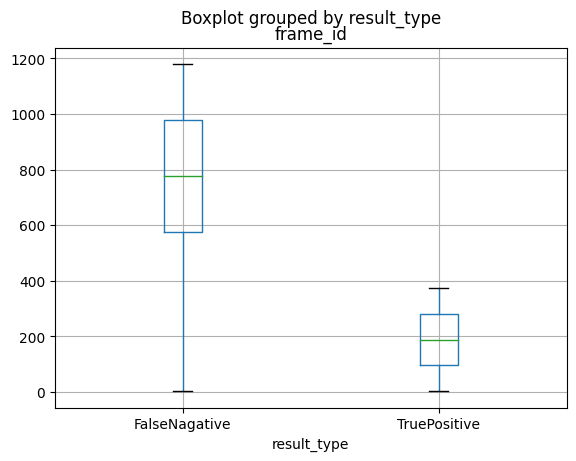

In [50]:
dnn_result_dataframe.boxplot(column='frame_id',by = 'result_type')

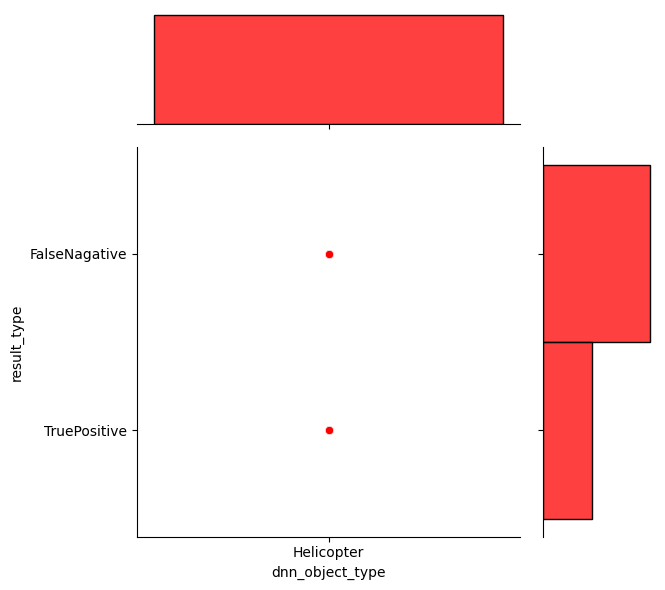

In [51]:
g = sns.jointplot(x=dnn_result_dataframe['dnn_object_type'], y=dnn_result_dataframe['result_type'], ratio=3, color="r")

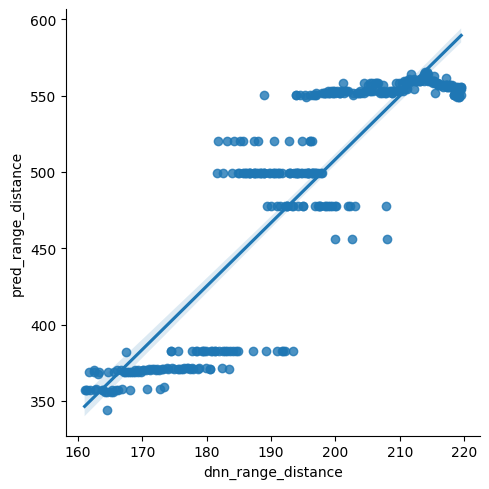

In [54]:
sns.lmplot(x="dnn_range_distance", y="pred_range_distance", data=dnn_result_dataframe)
plt.show()

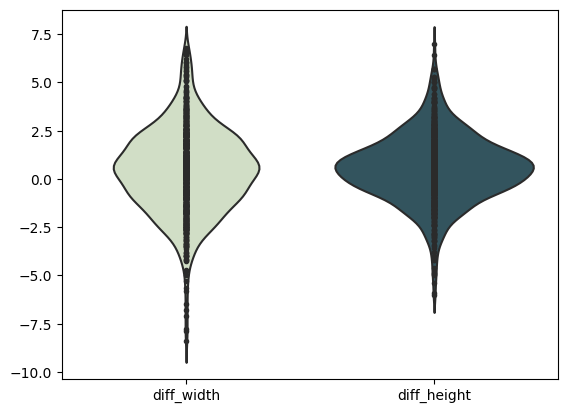

In [23]:
data1 = pd.DataFrame()
data1['diff_width'] = dnn_result_dataframe['dnn_width'] - dnn_result_dataframe['pred_width']
data1['diff_height'] = dnn_result_dataframe['dnn_height'] - dnn_result_dataframe['pred_height']

pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data1, palette=pal, inner="points")
plt.show()

C:\Users\Aircar\AppData\Local\Temp\ipykernel_7964\2339887062.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dnn_result_dataframe.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.2f',ax=ax)


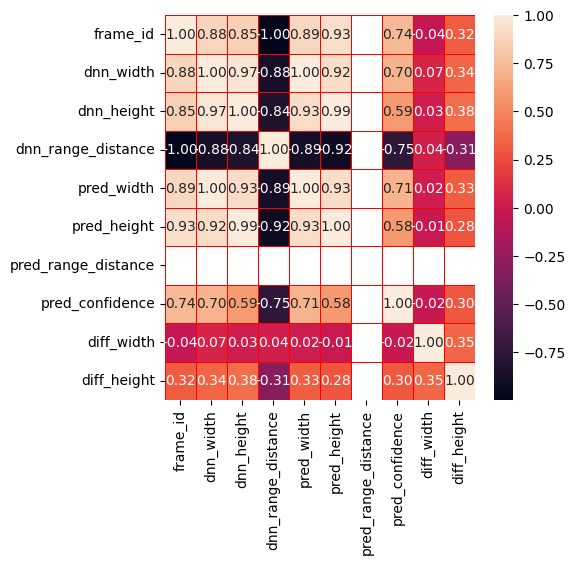

In [95]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(dnn_result_dataframe.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.2f',ax=ax)
plt.show()

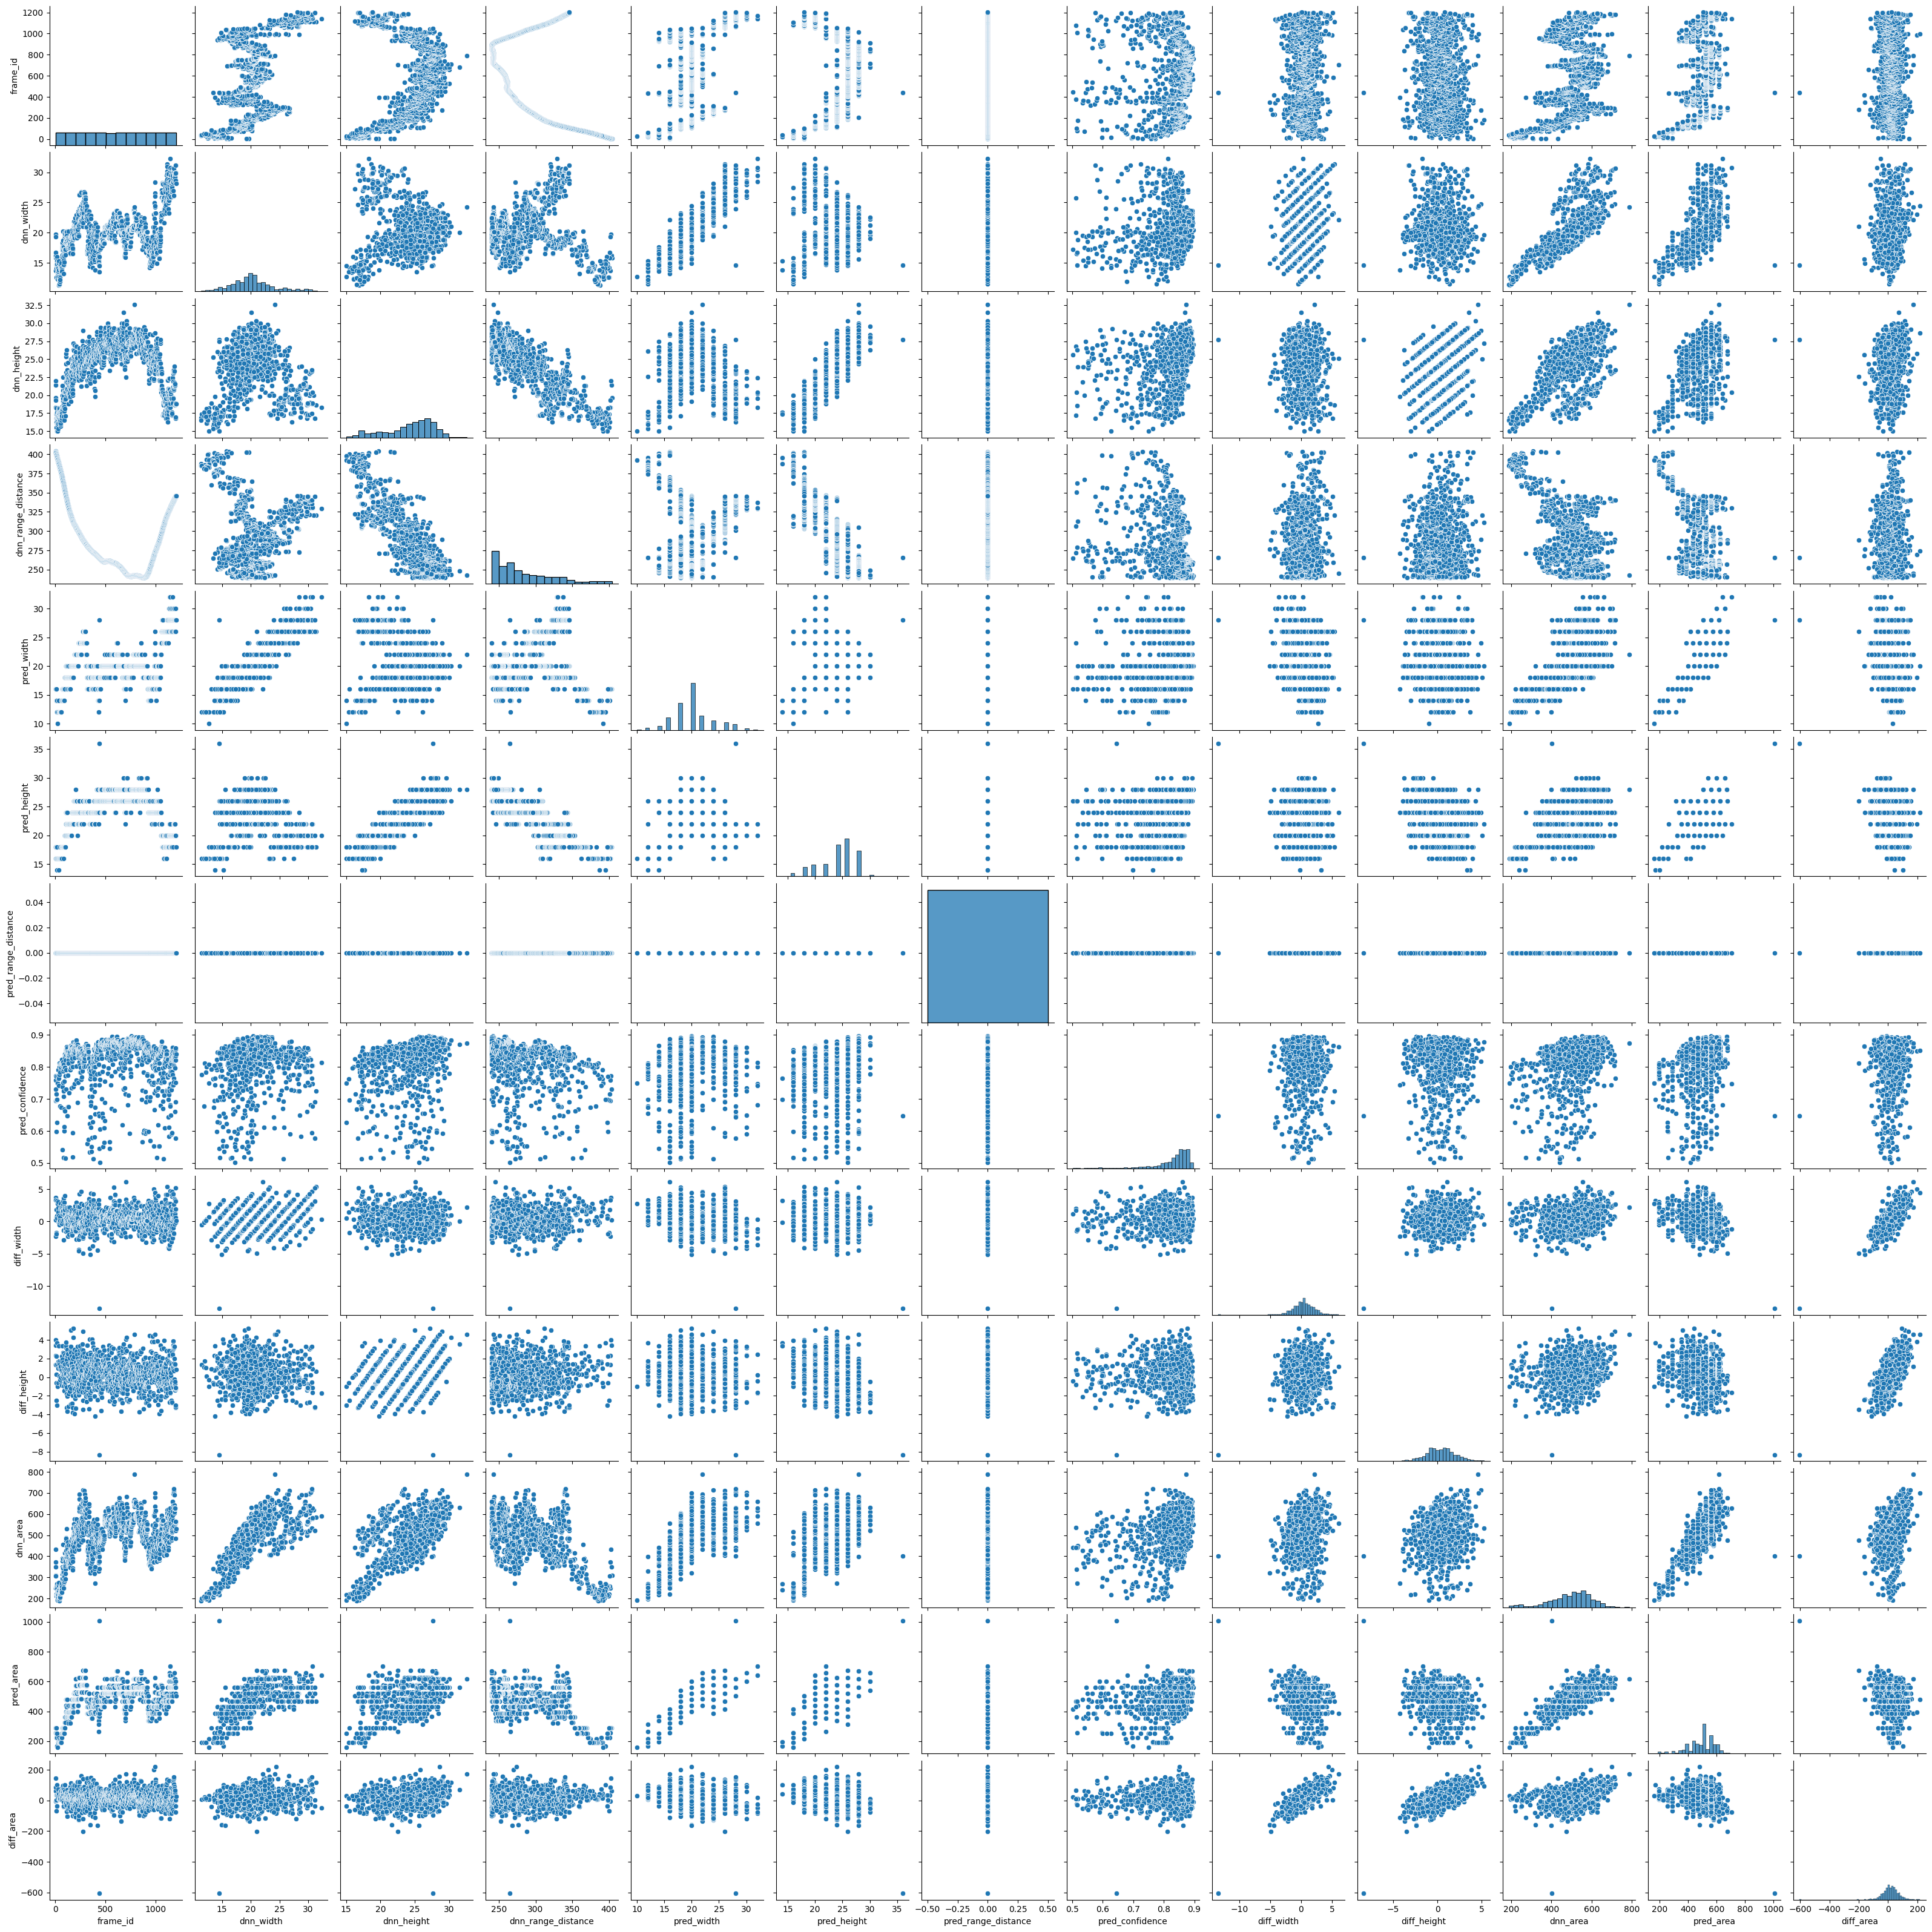

In [35]:
sns.pairplot(dnn_result_dataframe)
plt.show()

## DNN flight

In [52]:
#print(check_output(["ls", "../input"]).decode("utf8"))
path_flight_dnn = dnn_dataset+flight_id+".csv"

flight_dnn = pd.read_csv(path_flight_dnn)
#data.info()
flight_dnn.head()

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
0,0549a857cc834398b2346fc09fda508f,Airborne,Airborne2,3,1821.8,632.2,6.0,6.0,36.0,D://airborne-detection-starter-kit/data/part1/...,NaN
1,0549a857cc834398b2346fc09fda508f,Airborne,Airborne2,4,1837.4,637.2,6.0,6.0,36.0,D://airborne-detection-starter-kit/data/part1/...,NaN
2,0549a857cc834398b2346fc09fda508f,Airborne,Airborne2,5,1822.6,632.2,6.0,6.0,36.0,D://airborne-detection-starter-kit/data/part1/...,NaN
3,0549a857cc834398b2346fc09fda508f,Airborne,Airborne2,6,1852.0,639.4,6.0,6.0,36.0,D://airborne-detection-starter-kit/data/part1/...,NaN
4,0549a857cc834398b2346fc09fda508f,Airborne,Airborne2,7,1856.6,640.2,6.0,6.0,36.0,D://airborne-detection-starter-kit/data/part1/...,NaN


In [54]:
flight_dnn.tail()

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
382,0549a857cc834398b2346fc09fda508f,Bird,Bird2,128,422.2,992.0,6.0,6.0,36.0,D://airborne-detection-starter-kit/data/part1/...,NaN
383,0549a857cc834398b2346fc09fda508f,Bird,Bird2,129,422.4,994.8,6.0,6.0,36.0,D://airborne-detection-starter-kit/data/part1/...,NaN
384,0549a857cc834398b2346fc09fda508f,Bird,Bird2,130,426.6,996.6,6.0,6.0,36.0,D://airborne-detection-starter-kit/data/part1/...,NaN
385,0549a857cc834398b2346fc09fda508f,Bird,Bird2,131,416.2,991.6,6.0,6.0,36.0,D://airborne-detection-starter-kit/data/part1/...,NaN
386,0549a857cc834398b2346fc09fda508f,Bird,Bird2,132,404.2,991.8,6.0,6.0,36.0,D://airborne-detection-starter-kit/data/part1/...,NaN


In [55]:
flight_dnn.describe()

,frame_id,left,top,width,height,area,range_distance
count,387.00000,387.000000,387.000000,387.000000,387.000000,387.000000,130.000000
mean,67.03876,1376.965945,864.640342,15.948471,14.715275,582.153673,365.386006
std,37.35117,694.020705,216.900055,21.166863,16.566076,2014.577638,179.862709
min,3.00000,286.800000,290.000000,6.000000,6.000000,36.000000,61.161867
25%,35.00000,498.300000,612.300000,6.000000,6.000000,36.000000,210.646713
50%,67.00000,1648.000000,989.800000,6.000000,6.000000,36.000000,366.012658
75%,99.00000,2001.500000,1029.500000,16.000000,16.000000,256.000000,519.800639
max,132.00000,2436.800000,1125.800000,156.800000,124.600000,19242.073846,671.610599


In [56]:
flight_dnn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       387 non-null    object 
 1   object_type     387 non-null    object 
 2   object          387 non-null    object 
 3   frame_id        387 non-null    int64  
 4   left            387 non-null    float64
 5   top             387 non-null    float64
 6   width           387 non-null    float64
 7   height          387 non-null    float64
 8   area            387 non-null    float64
 9   image_path      387 non-null    object 
 10  range_distance  130 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 33.4+ KB


<Axes: title={'center': 'frame_id'}, xlabel='object_type'>

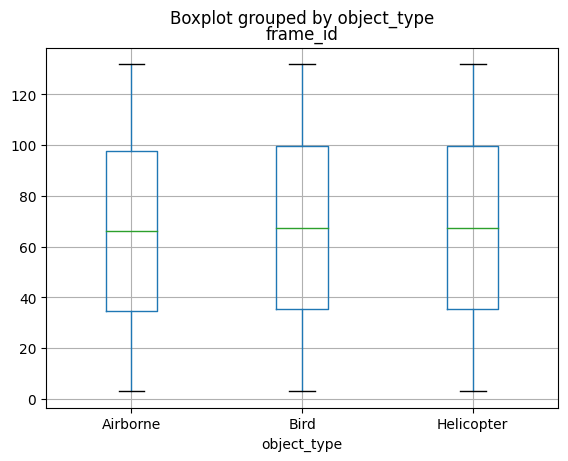

In [57]:
flight_dnn.boxplot(column='frame_id',by = 'object_type')

In [62]:
row_flight_dnn_dataframe= flight_dnn[flight_dnn["frame_id"]==10]
row_flight_dnn_dataframe

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
7,0549a857cc834398b2346fc09fda508f,Airborne,Airborne2,10,1865.4,637.2,6.0,6.0,36.0,D://airborne-detection-starter-kit/data/part1/...,NaN
134,0549a857cc834398b2346fc09fda508f,Helicopter,Helicopter1,10,1474.0,1120.8,16.0,16.0,256.0,D://airborne-detection-starter-kit/data/part1/...,639.010794
264,0549a857cc834398b2346fc09fda508f,Bird,Bird2,10,489.0,1000.6,6.0,6.0,36.0,D://airborne-detection-starter-kit/data/part1/...,NaN


## Pred Dataframe

In [12]:
#print(check_output(["ls", "../input"]).decode("utf8"))
path_dnn_pred_dataframe = os.path.join(output_path_folder+flight_id+"/")+'/dnn_pred_dataframe.csv'
dnn_pred_dataframe = pd.read_csv(path_dnn_pred_dataframe)
#data.info()
dnn_pred_dataframe.head()

,object_type,frame_id,left,top,width,height,area,range_distance,confidence
0,Airplane,159,1550.0,1172.0,58.0,18.0,1044.0,0,0.724027
1,Airplane,160,1556.0,1178.0,58.0,18.0,1044.0,0,0.717685
2,Airplane,161,1560.0,1178.0,62.0,18.0,1116.0,0,0.783671
3,Airplane,162,1570.0,1180.0,60.0,18.0,1080.0,0,0.797964
4,Airplane,163,1574.0,1188.0,64.0,20.0,1280.0,0,0.723258


In [67]:
dnn_pred_dataframe.describe()

,frame_id,left,top,width,height,area,range_distance,confidence
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000
mean,177.500000,1794.150000,1259.650000,100.650000,32.800000,3774.600000,0.0,0.854181
std,11.690452,219.898059,70.959559,36.890378,14.896566,3050.556644,0.0,0.059945
min,158.000000,1542.000000,1172.000000,56.000000,16.000000,896.000000,0.0,0.647267
25%,167.750000,1614.000000,1202.500000,76.000000,21.500000,1634.000000,0.0,0.843734
50%,177.500000,1743.000000,1240.000000,87.000000,27.000000,2376.000000,0.0,0.870259
75%,187.250000,1904.500000,1311.000000,124.500000,40.500000,5124.000000,0.0,0.897768
max,197.000000,2364.000000,1420.000000,192.000000,70.000000,12288.000000,0.0,0.925437


In [68]:
dnn_pred_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   object_type     40 non-null     object 
 1   frame_id        40 non-null     int64  
 2   left            40 non-null     float64
 3   top             40 non-null     float64
 4   width           40 non-null     float64
 5   height          40 non-null     float64
 6   area            40 non-null     float64
 7   range_distance  40 non-null     int64  
 8   confidence      40 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.9+ KB


In [69]:
dnn_pred_dataframe[dnn_pred_dataframe["frame_id"]==158]

,object_type,frame_id,left,top,width,height,area,range_distance,confidence
0,Airplane,158,1542.0,1172.0,56.0,16.0,896.0,0,0.752347


# Tum Dataseti Analiz 

In [25]:
import glob


dataset = pd.DataFrame()
for csv_file in glob.iglob(os.path.join(dnn_dataset, '*.csv')):
    dataframe_csv_file =pd.read_csv(csv_file)
    dataset = pd.concat([dataset,dataframe_csv_file],axis =0,ignore_index =True)


dataset.head()  

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
0,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,229,1551.358765,1121.692017,16.0,16.0,256.0,D://airborne-detection-starter-kit/data/part1/...,698.099154
1,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,230,1559.000000,1123.400000,16.0,16.0,256.0,D://airborne-detection-starter-kit/data/part1/...,692.553591
2,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,231,1561.330688,1119.515991,16.0,16.0,256.0,D://airborne-detection-starter-kit/data/part1/...,687.144329
3,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,232,1564.058960,1123.598999,16.0,16.0,256.0,D://airborne-detection-starter-kit/data/part1/...,681.758264
4,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,233,1563.531860,1124.573975,16.0,16.0,256.0,D://airborne-detection-starter-kit/data/part1/...,676.482461


In [26]:
dataset.tail()

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
7694,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1189,772.307692,233.076923,146.923077,176.153846,25881.065089,D://airborne-detection-starter-kit/data/part1/...,50.643230
7695,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1190,716.923077,136.923077,170.000000,194.615385,33084.615385,D://airborne-detection-starter-kit/data/part1/...,46.777990
7696,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1191,654.615385,21.538462,188.461538,230.000000,43346.153846,D://airborne-detection-starter-kit/data/part1/...,43.162551
7697,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1192,593.076923,4.615385,203.846154,147.692308,30106.508876,D://airborne-detection-starter-kit/data/part1/...,39.686723
7698,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1193,702.307692,3.846154,26.153846,23.076923,603.550296,D://airborne-detection-starter-kit/data/part1/...,36.513925


In [27]:
dataset.shape

(7699, 11)

In [28]:
# 'A' sütunundaki en büyük değere sahip elemana erişmek
max_value = dataset['range_distance'].max()

# 'A' sütunundaki en büyük değere sahip elemanın konumunu elde etmek
max_index = dataset['range_distance'].idxmax()

# sonucu yazdırmak
print('En büyük değer:', max_value)
print('En büyük değere sahip elemanın konumu:', max_index)

En büyük değer: 699.7864531996557
En büyük değere sahip elemanın konumu: 2250


In [29]:
max_row = dataset.loc[max_index]
max_row

flight_id                          01f9c2223f374f0c8a818933f4f7efca
object_type                                                Airplane
object                                                    Airplane1
frame_id                                                        847
left                                                         1454.8
top                                                          1016.6
width                                                          19.4
height                                                          6.4
area                                                         124.16
image_path        D://airborne-detection-starter-kit/data/part1/...
range_distance                                           699.786453
Name: 2250, dtype: object

In [33]:

dataset.dropna(inplace=True)
# dataset['range_distance'].replace(np.nan, 0, inplace=True)
#dataset['range_distance']=dataset['range_distance'].replace("None", '0', inplace=True)

In [34]:
dataset['range_distance'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7496 entries, 0 to 7698
Series name: range_distance
Non-Null Count  Dtype  
--------------  -----  
7496 non-null   float64
dtypes: float64(1)
memory usage: 117.1 KB


C:\Users\Aircar\AppData\Local\Temp\ipykernel_16392\2286633136.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, col_data in dataset.iteritems():


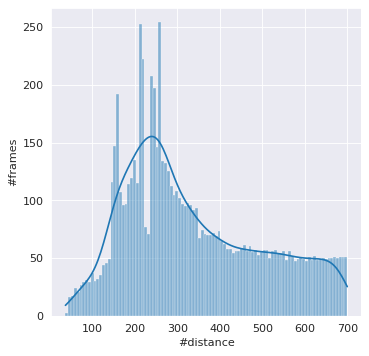

None

Avg:  339.3658495051708
Min:  36.5139250240362
Max:  699.7864531996557


In [35]:
obj_distance = []

for col_name, col_data in dataset.iteritems():
    if col_name == 'range_distance':
        for element in col_data:
                obj_distance.append(element)
               

#obj_distance = pd.Series(obj_distance).fillna(0).astype(float)

plt.figure(figsize=(5, 5), dpi=80)
with sns.axes_style("darkgrid"):
  sns.histplot(obj_distance, kde=True, bins=100)
plt.ylabel('#frames')
plt.xlabel('#distance')
display(plt.show())

print("Avg: ", sum(obj_distance) / len(obj_distance))
print("Min: ", min(obj_distance))
print("Max: ", max(obj_distance))

C:\Users\Aircar\AppData\Local\Temp\ipykernel_16392\3481847288.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, col_data in dataset.iteritems():


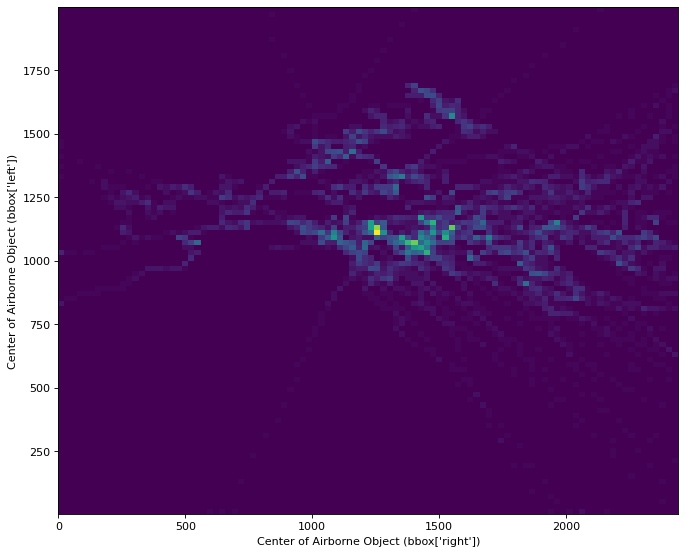

In [36]:
obj_center_left = []
obj_center_top = []


for col_name, col_data in dataset.iteritems():
    if col_name == 'left':
        for element in col_data:
                obj_center_left.append(element)

    elif col_name == 'top':
        for element in col_data:
                obj_center_top.append(element)


heatmap, xedges, yedges = np.histogram2d(obj_center_left, obj_center_top, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(10, 10), dpi=80)
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.ylabel("Center of Airborne Object (bbox['left'])")
plt.xlabel("Center of Airborne Object (bbox['right'])")
plt.show()

In [37]:
path_dnn_train = configurationManager.config_readable['dnn_rnn_dataset'] +"dnn_train.csv"
path_dnn_train

'../../Datasets/Mantis-Shrimp-Eye-s-Collision-Avoidance/rnn_dataset/dnn_train.csv'

In [38]:
dataset.to_csv(path_dnn_train, index=False)

In [39]:
dataset =pd.read_csv(path_dnn_train)
dataset

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
0,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,229,1551.358765,1121.692017,16.000000,16.000000,256.000000,D://airborne-detection-starter-kit/data/part1/...,698.099154
1,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,230,1559.000000,1123.400000,16.000000,16.000000,256.000000,D://airborne-detection-starter-kit/data/part1/...,692.553591
2,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,231,1561.330688,1119.515991,16.000000,16.000000,256.000000,D://airborne-detection-starter-kit/data/part1/...,687.144329
3,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,232,1564.058960,1123.598999,16.000000,16.000000,256.000000,D://airborne-detection-starter-kit/data/part1/...,681.758264
4,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,233,1563.531860,1124.573975,16.000000,16.000000,256.000000,D://airborne-detection-starter-kit/data/part1/...,676.482461
...,...,...,...,...,...,...,...,...,...,...,...
7491,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1189,772.307692,233.076923,146.923077,176.153846,25881.065089,D://airborne-detection-starter-kit/data/part1/...,50.643230
7492,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1190,716.923077,136.923077,170.000000,194.615385,33084.615385,D://airborne-detection-starter-kit/data/part1/...,46.777990
7493,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1191,654.615385,21.538462,188.461538,230.000000,43346.153846,D://airborne-detection-starter-kit/data/part1/...,43.162551
7494,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1192,593.076923,4.615385,203.846154,147.692308,30106.508876,D://airborne-detection-starter-kit/data/part1/...,39.686723
